In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
dflojas = pd.read_csv("lojas.csv")
dftreino = pd.read_csv("dataset_treino.csv")
dfteste = pd.read_csv("dataset_teste.csv")

In [8]:
dfteste['Customers'] = dftreino['Customers'].mean()

In [18]:
def strToInt(x):
    if x == 0 or x == '0':
        return 0
    elif x == 'a':
        return 1
    elif x == 'b':
        return 2
    elif x == 'c':
        return 3
    else:
        return 4

dftreino['StateHoliday'] = dftreino['StateHoliday'].apply(lambda x: strToInt(x))
dfteste['StateHoliday'] = dfteste['StateHoliday'].apply(lambda x: strToInt(x))

dftreino['Date'] = pd.DatetimeIndex(pd.to_datetime(dftreino['Date']), dtype='datetime64[ns]').astype(np.int64)
dfteste['Date'] = pd.DatetimeIndex(pd.to_datetime(dfteste['Date']), dtype='datetime64[ns]').astype(np.int64)

In [19]:
dfteste_rm_nas = dfteste.dropna()

In [20]:
dftreino.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [21]:
X = dftreino[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday']]

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
scaled_features

array([[-1.73164032,  0.50148416,  1.73412321, ...,  1.27323691,
        -0.17744237,  2.14421115],
       [-1.72853385,  0.50148416,  1.73412321, ...,  1.27323691,
        -0.17744237,  2.14421115],
       [-1.72542738,  0.50148416,  1.73412321, ...,  1.27323691,
        -0.17744237,  2.14421115],
       ...,
       [ 1.72275751, -1.00047591, -1.6945027 , ..., -0.78539979,
         5.63563255,  2.14421115],
       [ 1.72586398, -1.00047591, -1.6945027 , ..., -0.78539979,
         5.63563255,  2.14421115],
       [ 1.72897045, -1.00047591, -1.6945027 , ..., -0.78539979,
         5.63563255,  2.14421115]])

In [27]:
X_comp = dfteste_rm_nas[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday']]

scaler = StandardScaler()
scaler.fit(X_comp)
scaled_features_teste = scaler.transform(X_comp)
scaled_features_teste

array([[-1.7323186 ,  0.01025475,  1.69684136, ...,  1.23541927,
        -0.0663423 , -0.89290943],
       [-1.72607468,  0.01025475,  1.69684136, ...,  1.23541927,
        -0.0663423 , -0.89290943],
       [-1.71358684,  0.01025475,  1.69684136, ...,  1.23541927,
        -0.0663423 , -0.89290943],
       ...,
       [ 1.73930035,  1.00256194, -1.69615419, ..., -0.8094418 ,
        -0.0663423 , -0.89290943],
       [ 1.74242231,  1.00256194, -1.69615419, ..., -0.8094418 ,
        -0.0663423 , -0.89290943],
       [ 1.74554427,  1.00256194, -1.69615419, ..., -0.8094418 ,
        -0.0663423 ,  1.11993442]])

In [28]:
df_feat_treino = pd.DataFrame(scaled_features, columns=['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

df_feat_teste = pd.DataFrame(scaled_features_teste, columns=['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

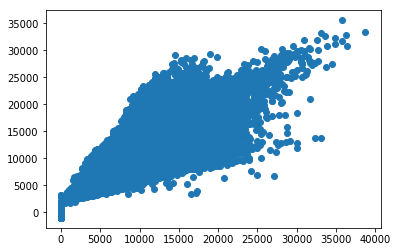

In [29]:
X = df_feat_treino[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday']]
y = dftreino['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
lm = LinearRegression()
lm.fit(X_train, y_train)
predict = lm.predict(X_test)
plt.scatter(y_test, predict)

In [31]:
X_Comp_teste = df_feat_teste[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday']]
predict_sales = lm.predict(X_Comp_teste)
X_Comp_teste['Sales'] = predict_sales
X_Comp_teste.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,-1.732319,0.010255,1.696841,1.0,0.412939,1.235419,-0.066342,-0.892909,9858.117088
1,-1.726075,0.010255,1.696841,1.0,0.412939,1.235419,-0.066342,-0.892909,9857.805071
2,-1.713587,0.010255,1.696841,1.0,0.412939,1.235419,-0.066342,-0.892909,9857.181037
3,-1.710465,0.010255,1.696841,1.0,0.412939,1.235419,-0.066342,-0.892909,9857.025028
4,-1.707343,0.010255,1.696841,1.0,0.412939,1.235419,-0.066342,-0.892909,9856.869020


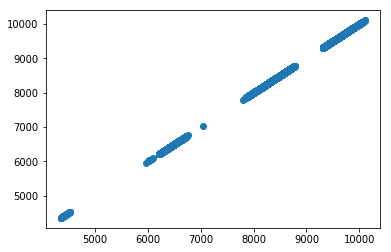

In [32]:
X = X_Comp_teste[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday']]
y = X_Comp_teste['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
lm = LinearRegression()
lm.fit(X_train, y_train)
predict = lm.predict(X_test)
plt.scatter(y_test, predict)

In [36]:
dfteste['Open'] = dfteste['Open'].median()

In [37]:
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Customers
0,1,1,4,1442448000000000000,0.854322,1,0,0,633.145946
1,2,3,4,1442448000000000000,0.854322,1,0,0,633.145946
2,3,7,4,1442448000000000000,0.854322,1,0,0,633.145946
3,4,8,4,1442448000000000000,0.854322,1,0,0,633.145946
4,5,9,4,1442448000000000000,0.854322,1,0,0,633.145946


In [38]:
X_comp = dfteste[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday']]

scaler = StandardScaler()
scaler.fit(X_comp)
scaled_features_teste = scaler.transform(X_comp)
scaled_features_teste

df_feat_teste_final = pd.DataFrame(scaled_features_teste, columns=['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

In [39]:
predict = lm.predict(df_feat_teste_final)
predict

array([9070.54219342, 9070.23013644, 9069.60602248, ..., 7075.72086159,
       7075.5648331 , 7121.95358475])

In [40]:
dfpredict_comp_sales = pd.DataFrame(predict)
dfpredict_comp_sales.index = np.arange(1, len(dfpredict_comp_sales)+1)
dfpredict_comp_sales.count()
dfpredict_comp_sales.to_csv('submissionSemMerge.csv')